In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

from Utils import report, roc_curve, plot_lost_history

In [2]:
df_original = pd.read_csv("../Datasets/DadosSpotify.csv")
df_original.head()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [3]:
df_original.shape

(2017, 17)

In [4]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [5]:
df_original["artist"].value_counts()

Drake                16
Rick Ross            13
Disclosure           12
WALK THE MOON        10
Backstreet Boys      10
                     ..
Real Connoisseur      1
Deep Purple           1
Brenton Wood          1
Ultimate Painting     1
Bleachers             1
Name: artist, Length: 1343, dtype: int64

In [6]:
df_original["song_title"].value_counts()

River                 3
Jack                  3
Mask Off              2
Be My Baby            2
Oblivion              2
                     ..
L'Amour Parfait       1
I Follow Rivers       1
From Nowhere          1
I Need You            1
I Wanna Get Better    1
Name: song_title, Length: 1956, dtype: int64

In [7]:
df_original["target"].value_counts()

1    1020
0     997
Name: target, dtype: int64

In [8]:
df_original.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2017.0,1008.000000,582.402066,0.000000,504.00000,1008.000000,1512.000,2016.000
acousticness,2017.0,0.187590,0.259989,0.000003,0.00963,0.063300,0.265,0.995
danceability,2017.0,0.618422,0.161029,0.122000,0.51400,0.631000,0.738,0.984
duration_ms,2017.0,246306.197323,81981.814219,16042.000000,200015.00000,229261.000000,270333.000,1004627.000
energy,2017.0,0.681577,0.210273,0.014800,0.56300,0.715000,0.846,0.998
instrumentalness,2017.0,0.133286,0.273162,0.000000,0.00000,0.000076,0.054,0.976
key,2017.0,5.342588,3.648240,0.000000,2.00000,6.000000,9.000,11.000
liveness,2017.0,0.190844,0.155453,0.018800,0.09230,0.127000,0.247,0.969
loudness,2017.0,-7.085624,3.761684,-33.097000,-8.39400,-6.248000,-4.746,-0.307
mode,2017.0,0.612295,0.487347,0.000000,0.00000,1.000000,1.000,1.000


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'duration_ms'}>],
       [<AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'liveness'}>],
       [<AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'tempo'}>],
       [<AxesSubplot:title={'center':'time_signature'}>,
        <AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>]],
      dtype=object)

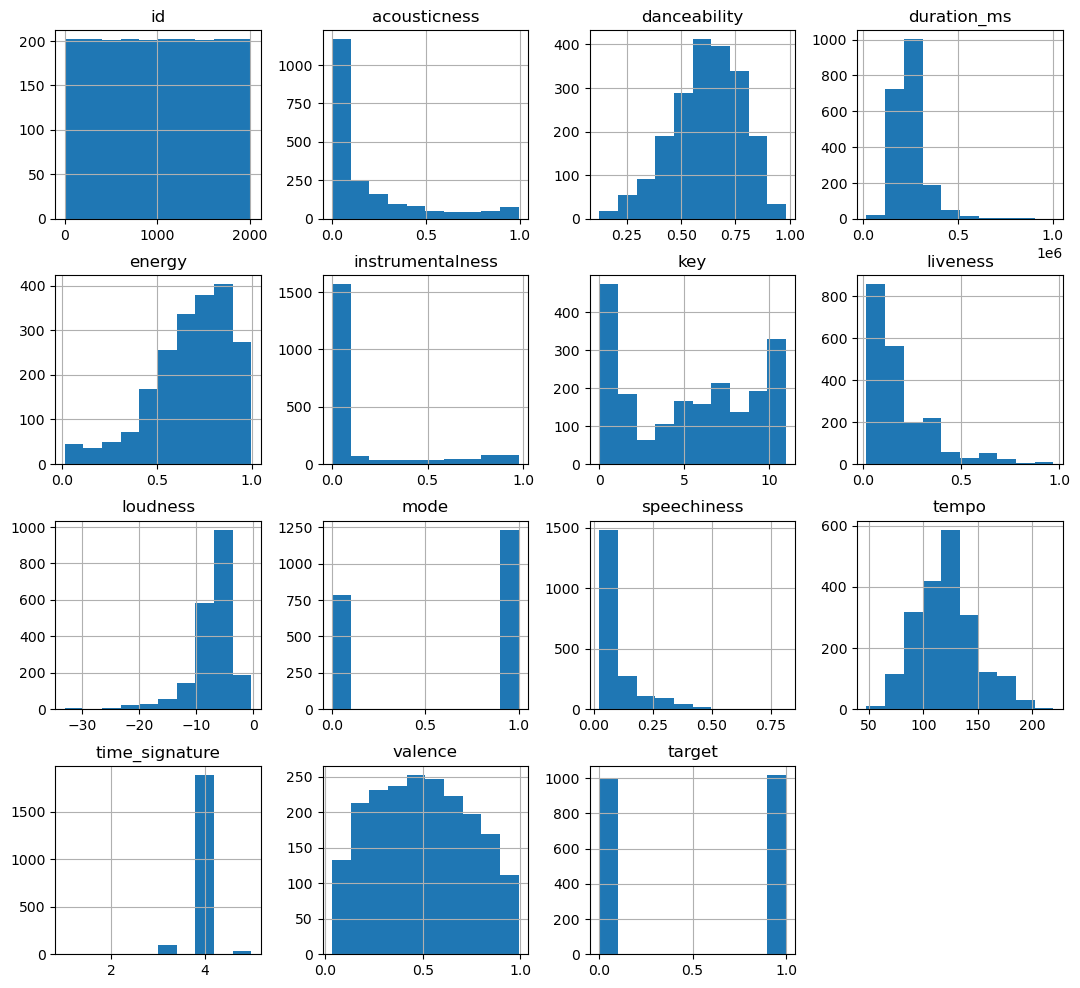

In [21]:
df_original.hist(figsize=(13, 12))

<AxesSubplot:>

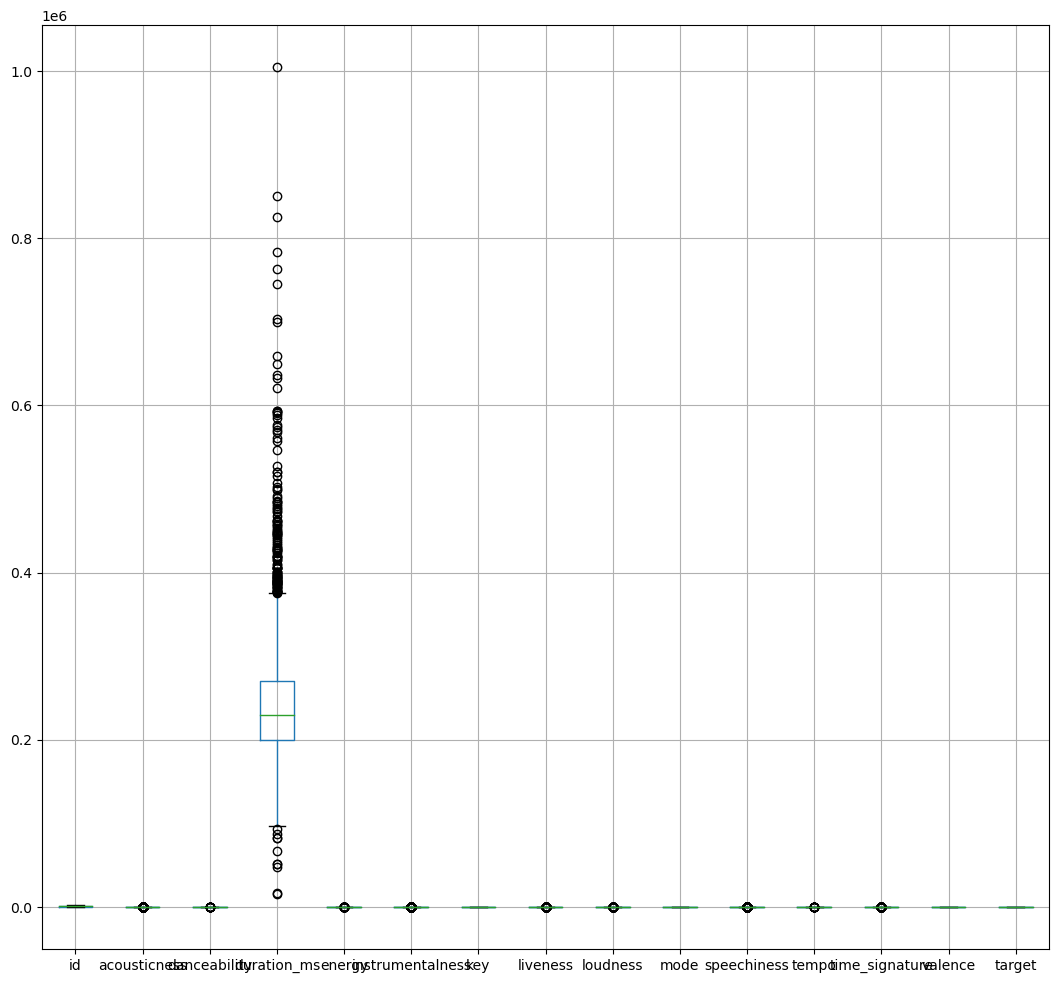

In [22]:
df_original.boxplot(figsize=(13, 12))

<AxesSubplot:>

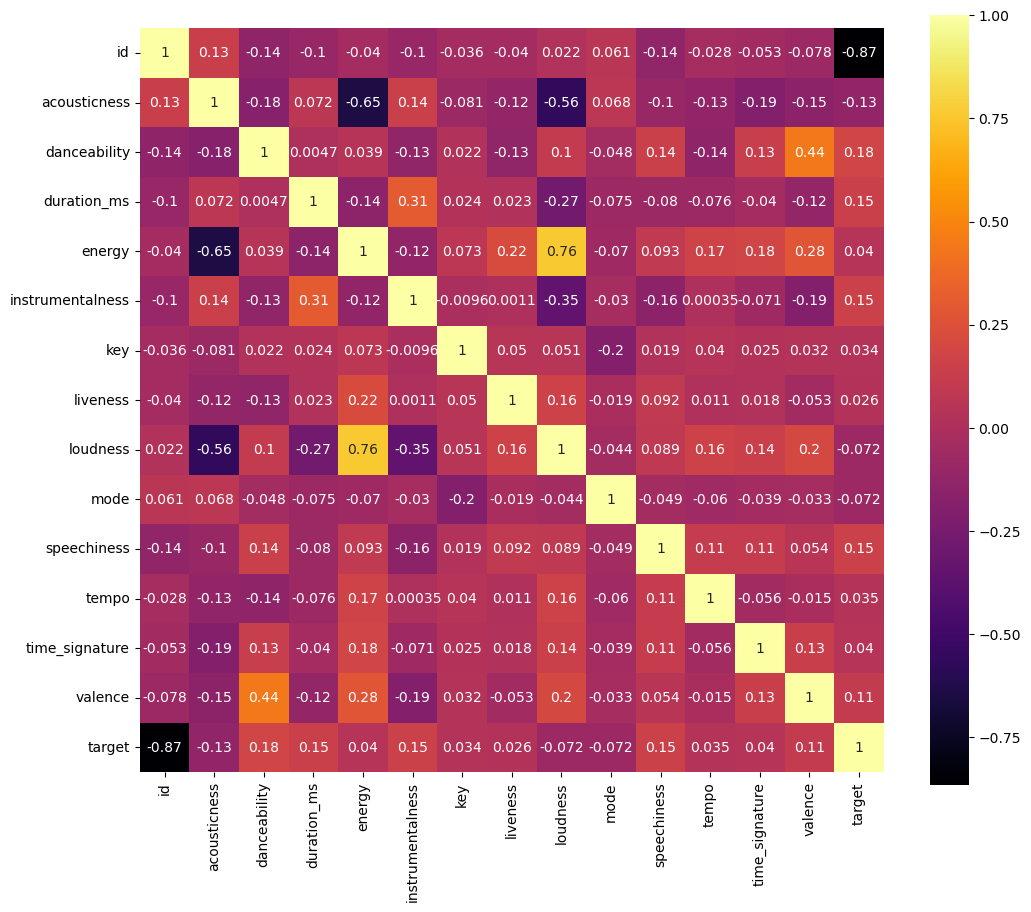

In [10]:
corr = df_original.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, vmax=1, square=True,annot=True,cmap='inferno')

In [11]:

# plt.figure(figsize=(8,4))

# plt.subplot(1, 2, 1)
# np.log(df_original["speechiness"]).hist()

# plt.subplot(1, 2, 2)
# df_original["speechiness"].hist()

In [12]:
lb = LabelEncoder()

df_model = df_original.copy()
df_model["artist"] = lb.fit_transform(df_model["artist"])
df_model["song_title"] = lb.fit_transform(df_model["song_title"])

In [13]:
df_model.head()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,1043,449
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,1334,222
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,1906,449
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,1044,95
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,1243,628


In [14]:
corr = df_model.corr()
corr["target"].sort_values(ascending=False)

target              1.000000
danceability        0.176706
speechiness         0.154006
instrumentalness    0.152594
duration_ms         0.146749
valence             0.107930
time_signature      0.040182
energy              0.039688
tempo               0.034732
key                 0.033594
liveness            0.026364
song_title         -0.000058
artist             -0.014588
loudness           -0.072000
mode               -0.072336
acousticness       -0.129627
id                 -0.865969
Name: target, dtype: float64

In [15]:
X = df_model[["danceability", "speechiness", "instrumentalness", "duration_ms", "valence", "time_signature", "energy","tempo", "key", "acousticness", "mode", "loudness"]]
y = df_model[["target"]]

In [16]:
X.shape

(2017, 12)

In [17]:
min_max_scaler = MinMaxScaler()
X_min_max = min_max_scaler.fit_transform(X)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_min_max, y, test_size=0.20, random_state=42)

Epoch 1/800


2022-10-19 19:51:20.896106: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/opt/anaconda3/envs/CustomEnvironments/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


51/51 [==============================] - 0s 3ms/step - loss: 0.6774 - accuracy: 0.5611 - val_loss: 0.6738 - val_accuracy: 0.5668
Epoch 2/800
51/51 [==============================] - 0s 1ms/step - loss: 0.6430 - accuracy: 0.6224 - val_loss: 0.6851 - val_accuracy: 0.5693
Epoch 3/800
51/51 [==============================] - 0s 1ms/step - loss: 0.6320 - accuracy: 0.6361 - val_loss: 0.6861 - val_accuracy: 0.5965
Epoch 4/800
 1/51 [..............................] - ETA: 0s - loss: 0.5773 - accuracy: 0.6562

/opt/anaconda3/envs/CustomEnvironments/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


51/51 [==============================] - 0s 1ms/step - loss: 0.6073 - accuracy: 0.6702 - val_loss: 0.6218 - val_accuracy: 0.6683
Epoch 5/800
51/51 [==============================] - 0s 1ms/step - loss: 0.5975 - accuracy: 0.6764 - val_loss: 0.6173 - val_accuracy: 0.6832
Epoch 6/800
51/51 [==============================] - 0s 1ms/step - loss: 0.5907 - accuracy: 0.6751 - val_loss: 0.6170 - val_accuracy: 0.6609
Epoch 7/800
51/51 [==============================] - 0s 1ms/step - loss: 0.5893 - accuracy: 0.6844 - val_loss: 0.6134 - val_accuracy: 0.6955
Epoch 8/800
51/51 [==============================] - 0s 1ms/step - loss: 0.5782 - accuracy: 0.6820 - val_loss: 0.6188 - val_accuracy: 0.6931
Epoch 9/800
51/51 [==============================] - 0s 1ms/step - loss: 0.5890 - accuracy: 0.6801 - val_loss: 0.6040 - val_accuracy: 0.6856
Epoch 10/800
51/51 [==============================] - 0s 1ms/step - loss: 0.5700 - accuracy: 0.6987 - val_loss: 0.5912 - val_accuracy: 0.6856
Epoch 11/800
51/51 [====

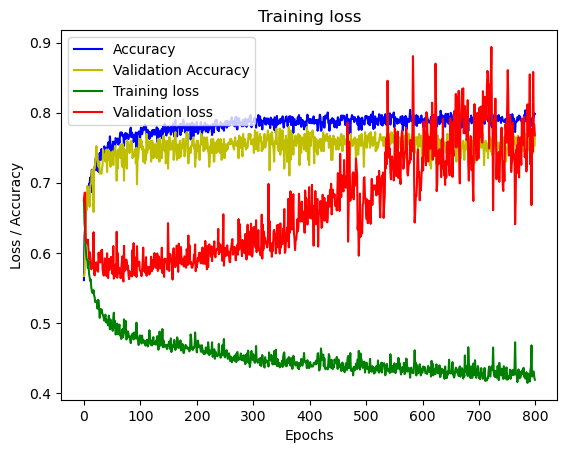

In [19]:

models =  Sequential(
    [
        Dense(8, activation = 'relu'),
        Dense(8, activation = 'relu'),
        Dense(4, activation = 'relu'),
        Dense(1, activation = 'sigmoid')
    ]
)
models.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.01),
    metrics=['accuracy']
)

models.fit(
    X_train,y_train,
    epochs=800,
    validation_data=(X_test, y_test)
)
plot_lost_history(models.history)